# Breast cancer wisconsin (diagnostic) dataset

#### Data Set Characteristics:

Number of Instances: 569

Number of Attributes: 30 numeric, predictive attributes and the class

Attribute Information:

    - radius (mean of distances from center to points on the perimeter)    
    - texture (standard deviation of gray-scale values)    
    - perimeter    
    - area    
    - smoothness (local variation in radius lengths)         
    - compactness (perimeter^2 / area - 1.0)       
    - concavity (severity of concave portions of the contour)       
    - concave points (number of concave portions of the contour)       
    - symmetry        
    - fractal dimension ("coastline approximation" - 1)
    

    The mean, standard error, and "worst" or largest (mean of the three
    largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 3 is Mean Radius, field
    13 is Radius SE, field 23 is Worst Radius.

    - class:
            - WDBC-Malignant
            - WDBC-Benign


:Missing Attribute Values: None

:Class Distribution: 212 - Malignant, 357 - Benign

:Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

:Donor: Nick Street

:Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.    
O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and prognosis via linear programming. Operations Research, 43(4), pages 570-577, July-August 1995.    
W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 163-171.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('Project2_cancer_classification.csv')

In [3]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df1.shape

(569, 31)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## 1. Feature Eng

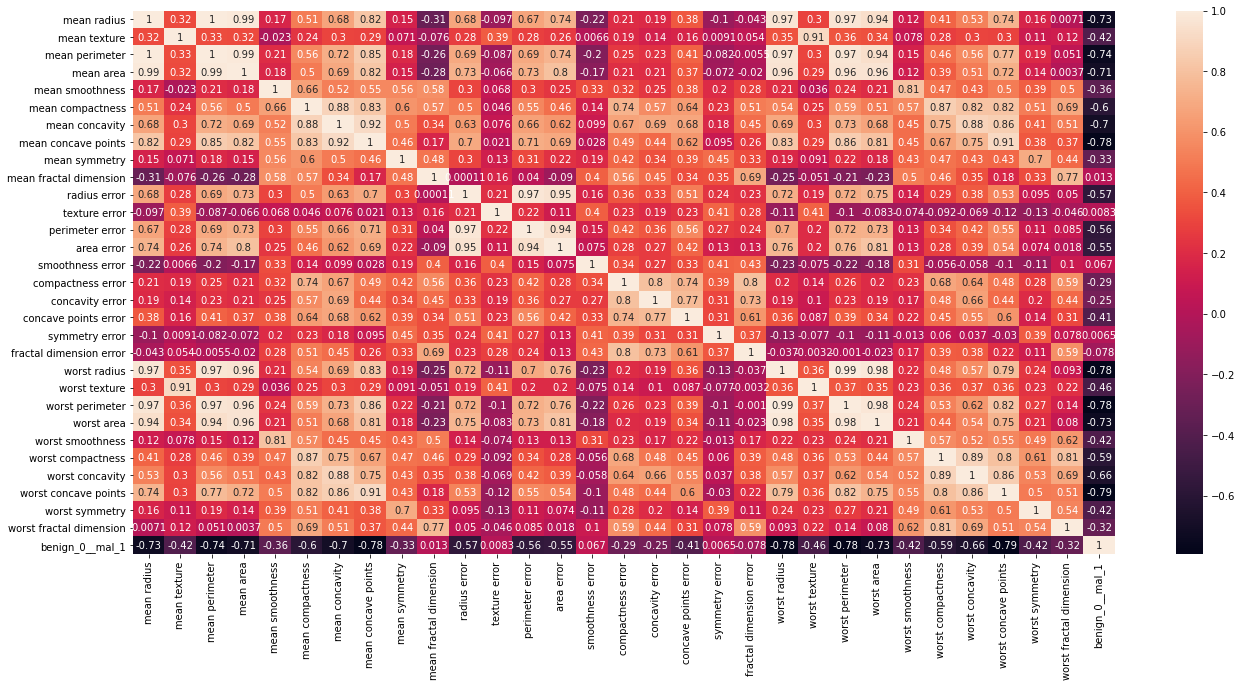

In [7]:
plt.figure(figsize=(22,10))
sns.heatmap(df1.corr(), annot=True);

In [8]:
df1.corr()['worst fractal dimension'].sort_values()

benign_0__mal_1           -0.323872
texture error             -0.045655
mean area                  0.003738
mean radius                0.007066
area error                 0.017539
radius error               0.049559
mean perimeter             0.051019
symmetry error             0.078079
worst area                 0.079647
perimeter error            0.085433
worst radius               0.093492
smoothness error           0.101480
mean texture               0.119205
worst perimeter            0.138957
worst texture              0.219122
concave points error       0.310655
mean concave points        0.368661
mean symmetry              0.438413
concavity error            0.439329
mean smoothness            0.499316
worst concave points       0.511114
mean concavity             0.514930
worst symmetry             0.537848
compactness error          0.590973
fractal dimension error    0.591328
worst smoothness           0.617624
worst concavity            0.686511
mean compactness           0

In [9]:
df1.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [10]:
df=df1.drop(['mean perimeter', 'mean area', 'worst radius', 'worst perimeter', 'worst area', 
    'worst texture', 'mean concavity', 'perimeter error', 'radius error', 'worst concave points', 
    'worst compactness', 'texture error', 'symmetry error'], axis=1)

In [11]:
df.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,area error,smoothness error,compactness error,concavity error,concave points error,fractal dimension error,worst smoothness,worst concavity,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,153.40,0.006399,0.04904,0.05373,0.01587,0.006193,0.1622,0.7119,0.4601,0.11890,0
1,20.57,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,74.08,0.005225,0.01308,0.01860,0.01340,0.003532,0.1238,0.2416,0.2750,0.08902,0
2,19.69,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,94.03,0.006150,0.04006,0.03832,0.02058,0.004571,0.1444,0.4504,0.3613,0.08758,0
3,11.42,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,27.23,0.009110,0.07458,0.05661,0.01867,0.009208,0.2098,0.6869,0.6638,0.17300,0
4,20.29,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,94.44,0.011490,0.02461,0.05688,0.01885,0.005115,0.1374,0.4000,0.2364,0.07678,0


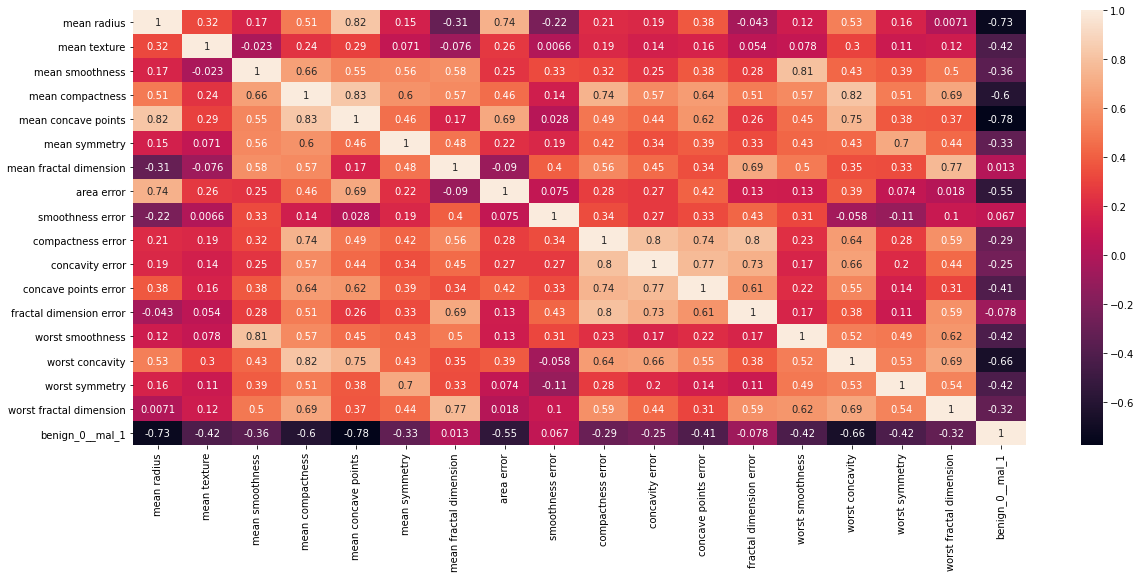

In [12]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True);

In [13]:
df.isnull().sum().any()

False

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean smoothness          569 non-null    float64
 3   mean compactness         569 non-null    float64
 4   mean concave points      569 non-null    float64
 5   mean symmetry            569 non-null    float64
 6   mean fractal dimension   569 non-null    float64
 7   area error               569 non-null    float64
 8   smoothness error         569 non-null    float64
 9   compactness error        569 non-null    float64
 10  concavity error          569 non-null    float64
 11  concave points error     569 non-null    float64
 12  fractal dimension error  569 non-null    float64
 13  worst smoothness         569 non-null    float64
 14  worst concavity          5

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744
area error,569.0,40.337079,45.491006,6.802000,17.850000,24.530000,45.190000,542.20000
smoothness error,569.0,0.007041,0.003003,0.001713,0.005169,0.006380,0.008146,0.03113
compactness error,569.0,0.025478,0.017908,0.002252,0.013080,0.020450,0.032450,0.13540


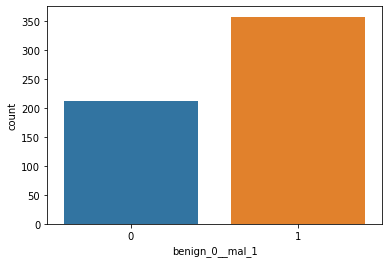

In [16]:
sns.countplot(x='benign_0__mal_1', data=df);

## 2. Train Test Split

In [17]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

## 3. Scaling Data

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 4.Creating the Model
For a binary classification problem    
model.compile(optimizer='rmsprop',     
              loss='binary_crossentropy',    
              metrics=['accuracy'])

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [20]:
X_train.shape

(426, 17)

In [21]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=8,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

## 4.1. Early Stopping
We are free to choose any epochs without wondering whether it is too big.
If val_loss increases as loss decreases, this means overfitting.
In case of too much training, we can use early stopping to track the val_loss and stop training once it begins increasing too much!

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

## 5. Training the Model

In [23]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 69ms/step - loss: 0.7142 - accuracy: 0.5837 - val_loss: 0.6867 - val_accuracy: 0.6154
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7017 - accuracy: 0.5787 - val_loss: 0.6784 - val_accuracy: 0.6154
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7041 - accuracy: 0.5697 - val_loss: 0.6724 - val_accuracy: 0.6154
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6797 - accuracy: 0.6148 - val_loss: 0.6672 - val_accuracy: 0.6294
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6719 - accuracy: 0.6500 - val_loss: 0.6610 - val_accuracy: 0.6503
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.6783 - val_loss: 0.6542 - val_accuracy: 0.6643
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.6523 - val_loss: 0.6438 - val_accuracy: 0.7273
Epoch 8/600


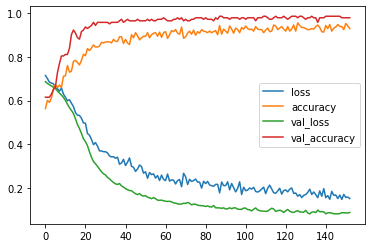

In [24]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot();

## 5.2. Adding in DropOut Layers

In [25]:
from tensorflow.keras.layers import Dropout

model_d = Sequential()

model_d.add(Dense(units=16,activation='relu'))
model_d.add(Dropout(0.5))
model_d.add(Dense(units=8,activation='relu'))
model_d.add(Dropout(0.5))
model_d.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model_d.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [26]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model_d.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/400
14/14 [==============================] - 1s 12ms/step - loss: 0.7065 - accuracy: 0.5960 - val_loss: 0.6799 - val_accuracy: 0.6154
Epoch 2/400
14/14 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.6336 - val_loss: 0.6741 - val_accuracy: 0.6154
Epoch 3/400
14/14 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.6145 - val_loss: 0.6682 - val_accuracy: 0.6154
Epoch 4/400
14/14 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.6702 - val_loss: 0.6619 - val_accuracy: 0.6154
Epoch 5/400
14/14 [==============================] - 0s 3ms/step - loss: 0.6569 - accuracy: 0.6556 - val_loss: 0.6535 - val_accuracy: 0.6154
Epoch 6/400
14/14 [==============================] - 0s 3ms/step - loss: 0.6715 - accuracy: 0.5925 - val_loss: 0.6458 - val_accuracy: 0.6154
Epoch 7/400
14/14 [==============================] - 0s 3ms/step - loss: 0.6441 - accuracy: 0.6355 - val_loss: 0.6382 - val_accuracy: 0.6154
Epoch 8/400


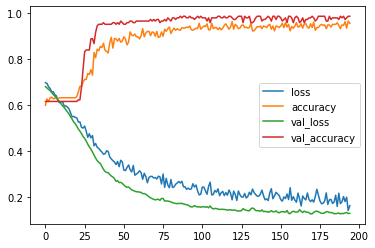

In [27]:
pd.DataFrame(model_d.history.history).plot();

## 6. Model Evaluation

In [30]:
pred = model.predict_classes(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,pred), '\n', '\n')
print(classification_report(y_test,pred))

[[54  1]
 [ 2 86]] 
 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [29]:
pred_d = model_d.predict_classes(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,pred_d), '\n', '\n')
print(classification_report(y_test,pred_d))

[[54  1]
 [ 1 87]] 
 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



Above wee see that model_d (the one with dropout) resulted in a higher accuracy